In [1]:
!pwd

/tf


In [2]:
!mkdir imagenet

In [4]:
# 버섯
!wget -O imagenet/mushroom1.jpg https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
!wget -O imagenet/mushroom2.jpg https://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg
!wget -O imagenet/mushroom3.jpg https://farm4.static.flickr.com/3003/2536991564_5f9b2f5b53.jpg
# 강아지
!wget -O imagenet/dog1.jpg https://farm1.static.flickr.com/58/160964915_d708f48d0d.jpg
!wget -O imagenet/dog2.jpg https://farm1.static.flickr.com/51/144906086_049df05364.jpg
!wget -O imagenet/dog3.jpg https://farm3.static.flickr.com/2133/2236535445_ca650757f2.jpg
#고양이
!wget -O imagenet/cat1.jpg https://farm1.static.flickr.com/131/393656824_bd89c512d0.jpg
!wget -O imagenet/cat2.jpg https://farm1.static.flickr.com/213/505539125_d7193beb76.jpg
!wget -O imagenet/cat3.jpg https://farm1.static.flickr.com/24/63785988_c16c10b4e5.jpg


--2019-11-04 13:54:24--  https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Resolving farm4.static.flickr.com (farm4.static.flickr.com)... 13.225.131.163, 2600:9000:21d3:f600:0:5a51:64c9:c681, 2600:9000:21d3:7200:0:5a51:64c9:c681, ...
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|13.225.131.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘imagenet/mushroom1.jpg’

imagenet/mushroom1.     [ <=>                ]  60.48K  --.-KB/s    in 0.01s   

2019-11-04 13:54:25 (5.61 MB/s) - ‘imagenet/mushroom1.jpg’ saved [61927]

--2019-11-04 13:54:25--  https://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg
Resolving farm3.static.flickr.com (farm3.static.flickr.com)... 13.225.131.163, 2600:9000:21e0:d600:0:5a51:64c9:c681, 2600:9000:21e0:be00:0:5a51:64c9:c681, ...
Connecting to farm3.static.flickr.com (farm3.static.flickr.com)|13.225.131.163|:443... connected.
HTTP request sent, awaiting response..

In [1]:
!ls -la imagenet

total 552
drwxr-xr-x 2 root root  4096 Nov  4 13:54 .
drwxr-xr-x 5 root root  4096 Nov  4 14:35 ..
-rw-r--r-- 1 root root 41064 Mar 13  2019 cat1.jpg
-rw-r--r-- 1 root root 53480 Mar 20  2019 cat2.jpg
-rw-r--r-- 1 root root 68339 Mar 28  2019 cat3.jpg
-rw-r--r-- 1 root root 68759 Mar 23  2019 dog1.jpg
-rw-r--r-- 1 root root 72968 Mar 23  2019 dog2.jpg
-rw-r--r-- 1 root root 70680 Mar 31  2019 dog3.jpg
-rw-r--r-- 1 root root 61927 Aug 21 00:06 mushroom1.jpg
-rw-r--r-- 1 root root 72318 Mar 24  2019 mushroom2.jpg
-rw-r--r-- 1 root root 25326 Feb 23  2019 mushroom3.jpg


In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from IPython.display import display
import numpy as np
import PIL

Using TensorFlow backend.


In [11]:
def predict_vgg16(model, filename) : 
    # image 화면표시
    image = load_img(filename)
    #image = PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=688X550
    display(image)
    
    # resize해서 로딩
    image = load_img(filename, target_size=(224,224))
    image = img_to_array(image) # nd.array
    print(f'image.shape : {image.shape}') #(224,224,3)
    
    # vgg16.preprocess_input()위해 차원조정
    image = image.reshape((1,224,224,3))
    
    #데이터 전처리, -255~255 정규화, RGB->BGR
    image = vgg16.preprocess_input(image)
    
    #이미지를 모델에 적용
    yhat = model.predict(image)
    # 1000개의 클래스에 대한 결과 값
    
    # 모델적용된 결과를 파싱
    label = vgg16.decode_predictions(yhat)
    # label = [[( , ,), ...]] # list
    # print(f'label.shape : {label.shape}') ==> error (because list)
    
    #가장 확률이 높은 결과를 획득
    label = label[0][0]
    
    print(f'label[1] : {label[1]}, label[2]*100:.2f : {label[2]*100:.2f}')
    

In [8]:
files = {'imagenet/mushroom1.jpg', 'imagenet/mushroom2.jpg', 'imagenet/mushroom3.jpg',
         'imagenet/dog1.jpg', 'imagenet/dog2.jpg', 'imagenet/dog3.jpg',
         'imagenet/cat1.jpg','imagenet/cat2.jpg','imagenet/cat1.jpg'}

In [9]:
from keras.applications import vgg16

model = vgg16.VGG16()
#https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

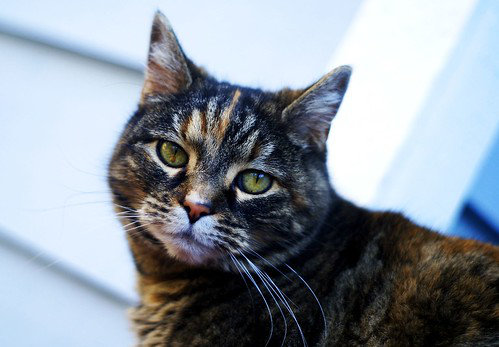

image.shape : (224, 224, 3)
label[1] : tabby, label[2]*100:.2f : 56.47


In [12]:
predict_vgg16(model, 'imagenet/cat1.jpg')

# for file in files : 
#     predict_vgg16(model, file)